In [115]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder

In [99]:
colnames=['sepal_length', 'sepal_width', 'petal_length', 'petal_width','Class'] 
iris = pd.read_csv('iris.data',names=colnames, header=None)
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [11]:
#Draw Pairplot
sns.pairplot(iris, hue="Class", markers=["o", "s", "D"], corner=True)
plt.savefig('Pairplot.png',dpi = 300)

In [19]:
#Draw Histogram
fig, axes = plt.subplots(2, 2, figsize=(10,10))
axes[0,0].set_title("Sepal Length (cm)")
axes[0,0].hist(iris['sepal_length'], bins=7,histtype='step') 
axes[0,1].set_title("Sepal Width (cm)")
axes[0,1].hist(iris['sepal_width'], bins=6,histtype='step');
axes[1,0].set_title("Petal Length (cm)")
axes[1,0].hist(iris['petal_length'], bins=6,histtype='step');
axes[1,1].set_title("Petal Width (cm)")
axes[1,1].hist(iris['petal_width'], bins=6,histtype='step');
plt.savefig('Histogram.png',dpi = 300)

In [100]:
y = np.array(iris.Class)
iris.drop(['Class'],1,inplace=True)
X=iris.values
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2,random_state=6608)

C:\Users\hasib\AppData\Local\Temp\ipykernel_1884\1955028768.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  iris.drop(['Class'],1,inplace=True)


In [49]:
#Check overfitting with max_depth
training_accuracy = []
test_accuracy = []

# try max_depth from 1 to 11
depth_settings = range(1, 11)

for n_depth in depth_settings:
    # build the model
    tree = DecisionTreeClassifier(max_depth=n_depth,random_state=6608)
    tree.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(tree.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(tree.score(X_test, y_test))  
plt.plot(depth_settings, training_accuracy, label="training accuracy");
plt.plot(depth_settings, test_accuracy, label="test accuracy");
plt.ylabel("Accuracy");
plt.xlabel("Max_depths");
plt.legend();
plt.grid();
plt.title("Overfitting test to decide Max_depth for Single Decision Tree");
plt.savefig('Single_Overfitting.png',dpi = 300)
#use max_depth =4  

In [101]:
tree = DecisionTreeClassifier(max_depth=4,random_state=6608)
tree.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.967


In [133]:
#Visualization of selected regression tree
export_graphviz(tree, out_file="tree.dot",feature_names=iris.columns, impurity=False, filled=True)
export_graphviz(tree, out_file="tree.dot",feature_names=iris.columns, impurity=False, filled=True)
import graphviz
with open("tree.dot") as f:
    dot_graph = f.read()
graph = graphviz.Source(dot_graph,format='png')  
graph.format = 'png'
graph.render('dtree_render',view=True)

'dtree_render.png'

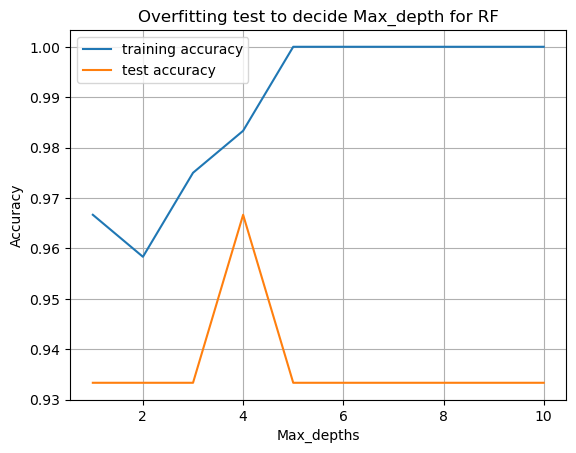

In [102]:
#Check overfitting with max_depth Random Forest
training_accuracy = []
test_accuracy = []

# try max_depth from 1 to 11
depth_settings = range(1, 11)

for n_depth in depth_settings:
    # build the model
    RF = RandomForestClassifier(max_depth=n_depth,random_state=6608)
    RF.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(RF.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(RF.score(X_test, y_test))  
plt.plot(depth_settings, training_accuracy, label="training accuracy");
plt.plot(depth_settings, test_accuracy, label="test accuracy");
plt.ylabel("Accuracy");
plt.xlabel("Max_depths");
plt.legend();
plt.grid();
plt.title("Overfitting test to decide Max_depth for RF");
#use max_depth =4  
plt.show()

In [103]:
RF = RandomForestClassifier(max_depth=4,random_state=6608)
RF.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(RF.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(RF.score(X_test, y_test)))

Accuracy on training set: 0.983
Accuracy on test set: 0.967


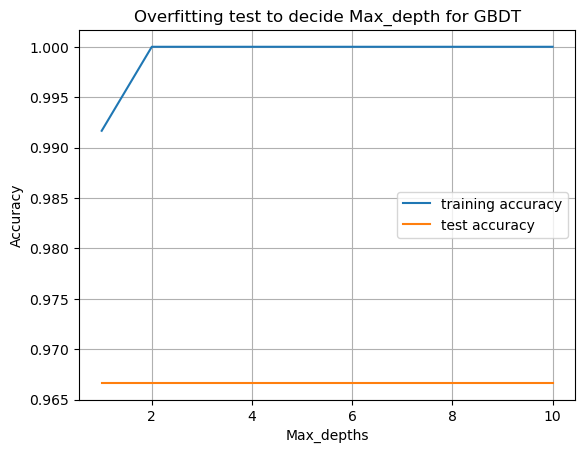

In [106]:
#Check overfitting with max_depth GBDT
training_accuracy = []
test_accuracy = []

# try max_depth from 1 to 11
depth_settings = range(1, 11)

for n_depth in depth_settings:
    # build the model
    GB = GradientBoostingClassifier(max_depth=n_depth,random_state=6608)
    GB.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(GB.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(GB.score(X_test, y_test))  
plt.plot(depth_settings, training_accuracy, label="training accuracy");
plt.plot(depth_settings, test_accuracy, label="test accuracy");
plt.ylabel("Accuracy");
plt.xlabel("Max_depths");
plt.legend();
plt.grid();
plt.title("Overfitting test to decide Max_depth for GBDT");
#use max_depth =2 
plt.show()

In [107]:
GB = GradientBoostingClassifier(max_depth=2,random_state=6608)
GB.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(GB.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(GB.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.967


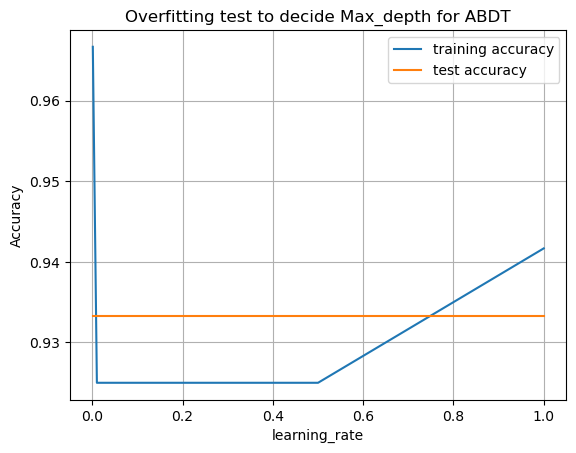

In [109]:
#Check overfitting with max_depth AdaBoost
training_accuracy = []
test_accuracy = []

# try max_depth from 1 to 11
learning_rates = [0.001,0.01,0.05,0.1,0.5,1] 

for learning_rate in learning_rates:
    # build the model
    AB = AdaBoostClassifier(n_estimators = 100, learning_rate = learning_rate,random_state=6608)
    AB.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(AB.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(AB.score(X_test, y_test))  
plt.plot(learning_rates, training_accuracy, label="training accuracy");
plt.plot(learning_rates, test_accuracy, label="test accuracy");
plt.ylabel("Accuracy");
plt.xlabel("learning_rate");
plt.legend();
plt.grid();
plt.title("Overfitting test to decide Max_depth for ABDT");
#use learning_rate = 0.001
plt.show()

In [111]:
AB = AdaBoostClassifier(n_estimators = 100, learning_rate = 0.001,random_state=6608)
AB.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(AB.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(AB.score(X_test, y_test)))

Accuracy on training set: 0.967
Accuracy on test set: 0.933


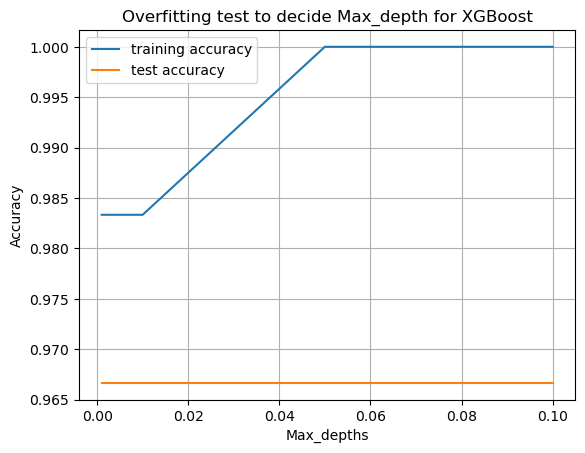

In [124]:
#XGBoost
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.fit_transform(y_test)
#Check overfitting with max_depth XGB
training_accuracy = []
test_accuracy = []

# try max_depth from 1 to 11
learning_rates = [0.001,0.01,0.05,0.1]

for learning_rate in learning_rates:
    # build the model
    XGB = XGBClassifier(n_estimators = 100,max_depth = 4,learning_rate=learning_rate,random_state=6608)
    XGB.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(XGB.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(XGB.score(X_test, y_test))  
plt.plot(learning_rates, training_accuracy, label="training accuracy");
plt.plot(learning_rates, test_accuracy, label="test accuracy");
plt.ylabel("Accuracy");
plt.xlabel("Max_depths");
plt.legend();
plt.grid();
plt.title("Overfitting test to decide Max_depth for XGBoost");
plt.show()
#Learning_rate = 0.05 taken

In [125]:
XGB = XGBClassifier(n_estimators = 100, max_depth=4,learning_rate = 0.05, random_state=6608)
XGB.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(XGB.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(XGB.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.967


In [132]:
#plot feature importance
fig,ax=plt.subplots(figsize=(10,10))

def plot_feature_importances_decision_tree(m1,m2,m3,m4,m5):
    n_features = len(iris.columns)
    plt.barh(range(n_features), m1.feature_importances_, align='center',edgecolor='purple', color='None',label = 'Single Decision Tree')
    plt.barh(range(n_features), m2.feature_importances_, align='center',edgecolor='Red', color='None',label = 'Random Forest')
    plt.barh(range(n_features), m3.feature_importances_, align='center',edgecolor='Blue', color='None',label = 'Gradient Boosting')
    plt.barh(range(n_features), m4.feature_importances_, align='center',edgecolor='Black', color='None',label = 'AdaBoost')
    plt.barh(range(n_features), m5.feature_importances_, align='center',edgecolor='Orange', color='None',label = 'XGBoost')
    plt.yticks(np.arange(n_features), iris.columns)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)
    plt.title("Feature importance of single decision tree")
    plt.legend()

plot_feature_importances_decision_tree(tree,RF,GB,AB,XGB)
plt.savefig('Feature_importance.png',dpi = 300)

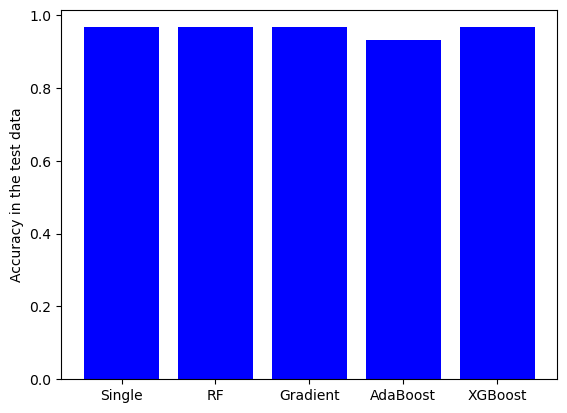

In [137]:
Model = ['Single','RF','Gradient','AdaBoost','XGBoost']
Accuracy = [0.967,0.967,0.967,0.933,0.967]
plt.bar(Model,Accuracy, color ='blue')
plt.ylabel("Accuracy in the test data");
plt.savefig('barplot_test.png', dpi = 300)
plt.show()

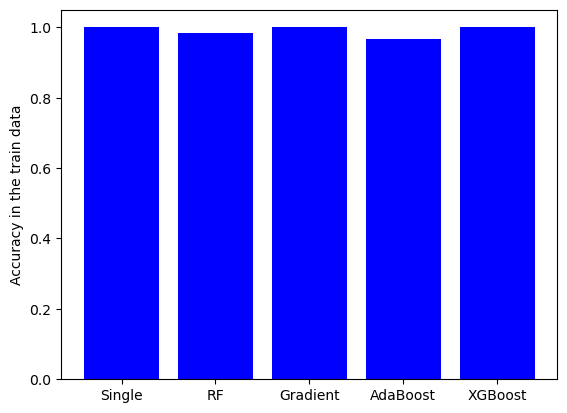

In [138]:
Model = ['Single','RF','Gradient','AdaBoost','XGBoost']
Accuracy = [1.00,0.983,1.0,0.967,1.0]
plt.bar(Model,Accuracy, color ='blue')
plt.ylabel("Accuracy in the train data");
plt.savefig('barplot_train.png', dpi = 300)
plt.show()